In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('BostonHousing.csv')

In [27]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [29]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

COLUMNS AND ITS MEANING

    CRIM: Per capita crime rate by town
    ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
    INDUS: Proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Proportion of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TRATIO: Pupil-teacher ratio by town
    B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s


<AxesSubplot:>

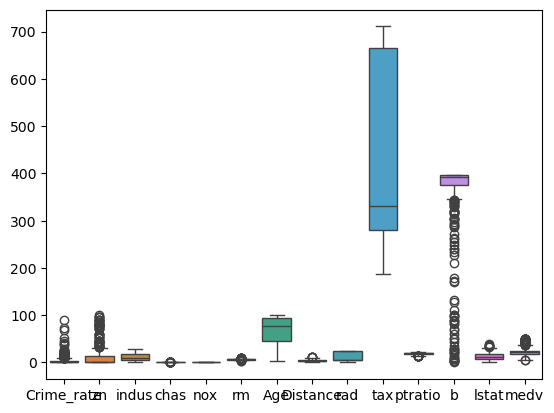

In [30]:
sns.boxplot(data=df)


<AxesSubplot:ylabel='medv'>

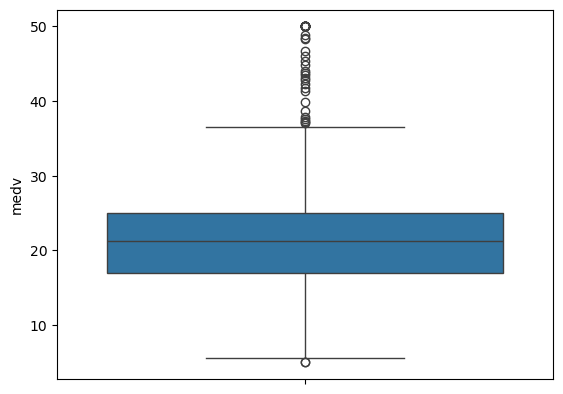

In [31]:
sns.boxplot(data=df.medv)

<AxesSubplot:xlabel='Crime_rate', ylabel='Count'>

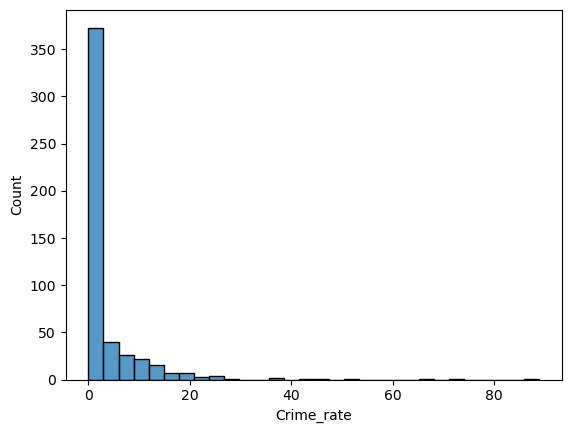

In [45]:
sns.histplot(data=df['Crime_rate'],bins=30)

<AxesSubplot:>

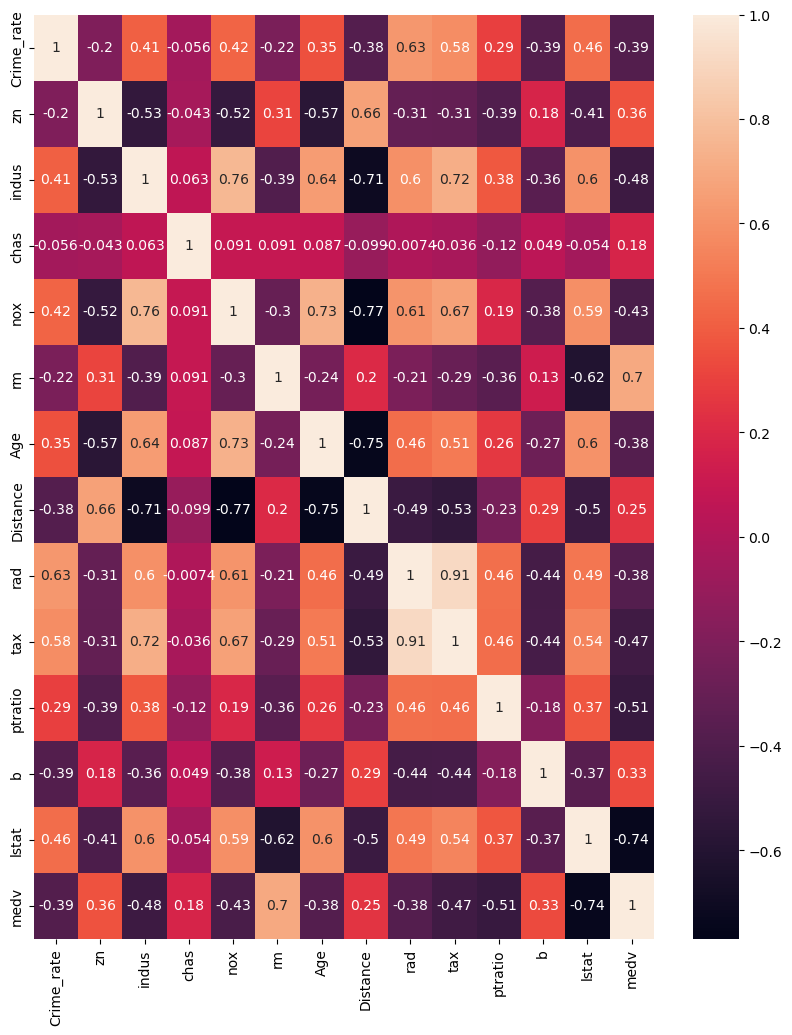

In [48]:
#correlation matrix
plt.figure(figsize=(10,12))
sns.heatmap(data=df.corr(),annot=True)